<a href="https://colab.research.google.com/github/imranttsia/Deep-learning/blob/main/LSTM_on_IMBD_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# he following example returns the full state sequence:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
max_features = 10000
max_len = 500
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [5]:
from keras.layers import LSTM, Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 72s 443ms/step - loss: 0.5868 - acc: 0.6795 - val_loss: 0.4203 - val_acc: 0.8200
Epoch 2/5
157/157 [==============================] - 66s 422ms/step - loss: 0.3417 - acc: 0.8596 - val_loss: 0.5944 - val_acc: 0.8188
Epoch 3/5
157/157 [==============================] - 67s 429ms/step - loss: 0.2677 - acc: 0.8971 - val_loss: 0.3022 - val_acc: 0.8792
Epoch 4/5
157/157 [==============================] - 68s 432ms/step - loss: 0.2247 - acc: 0.9161 - val_loss: 0.2919 - val_acc: 0.8892
Epoch 5/5
157/157 [==============================] - 69s 441ms/step - loss: 0.2006 - acc: 0.9263 - val_loss: 0.3393 - val_acc: 0.8602


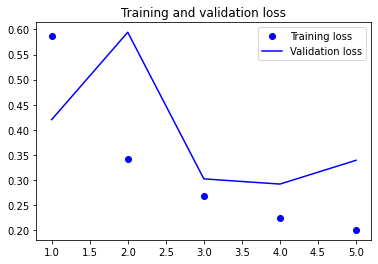

In [6]:

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()